## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206.

In [ ]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('./data/training_data.csv')
df_test = pd.read_csv('./data/testing_data.csv')

y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [ ]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.08717964343852191
RMSE:  0.20599583849612824


This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).

Import data

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv('/content/training_data.csv')
df_test = pd.read_csv('/content/testing_data.csv')

# Data Wrangling


## Clean df_train and df_test

In [195]:
# Check dimensions
df_train.head()
# df_train.shape = (4087, 13)
# df_test.shape = (1023, 13)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [196]:
# make column names lowercase
df_train.columns = map(str.lower, df_train.columns)
df_test.columns = map(str.lower, df_test.columns)

In [197]:
# drop uncessary columns (Unamed: 0, and id)
df_train = df_train.drop(df_train.columns[:2], axis=1)
df_test = df_test.drop(df_test.columns[:2], axis=1)

In [198]:
# Check for null vals
df_train.isna().sum() # 159 null values in bmi
df_test.isna().sum() # 42 null values in bmi


gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [199]:
df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())
df_test['bmi'] = df_test['bmi'].fillna(df_train['bmi'].mean())
## 159 null values compared to the total of 4087 rows seemed fairly insignificant.
## So, the null values were filled in with the average value of the 'bmi' column.
## (same with 42 compared to 1023 values for the testing data)

## Numeric Outliers

<Axes: >

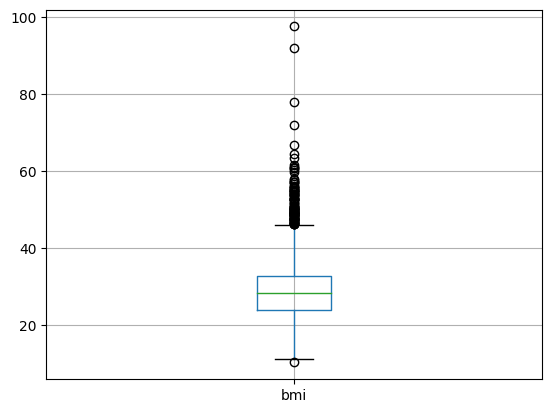

In [200]:
df_train.boxplot(column='bmi')
# there are outliers, but since there are so many, it was decided to keep them in case they help indicate the likeliness of a stroke.

<Axes: >

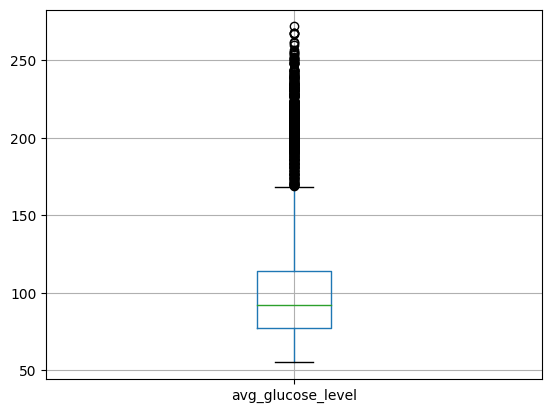

In [201]:
df_train.boxplot(column='avg_glucose_level')
# same as above, there are many outliers; may be important later

<Axes: >

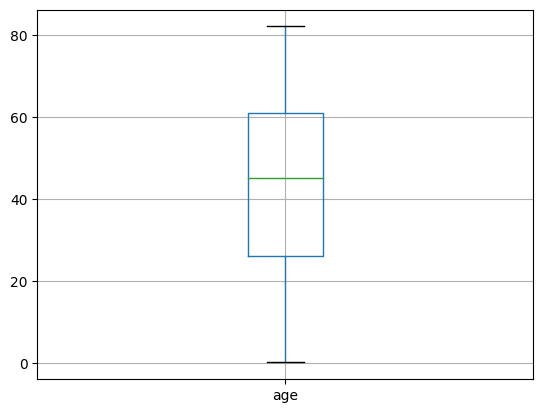

In [202]:
df_train.boxplot(column='age')
# no outliers

In [203]:
print("Heart Disease: \n", df_train['heart_disease'].value_counts())
print("Hypertension: \n", df_train['hypertension'].value_counts())
print("Stroke: \n", df_train['stroke'].value_counts())
# all values are 0 or 1, no need to clean anything

Heart Disease: 
 0    3858
1     229
Name: heart_disease, dtype: int64
Hypertension: 
 0    3687
1     400
Name: hypertension, dtype: int64
Stroke: 
 0    3888
1     199
Name: stroke, dtype: int64


## String Outliers

In [204]:
print("Gender: ", df_train['gender'].unique())
print("Ever Married: ", df_train['ever_married'].unique())
print("Work Type: ", df_train['work_type'].unique())
print("Residence Status: ", df_train['residence_type'].unique())
print("Smoking Status: ", df_train['smoking_status'].unique())

Gender:  ['Male' 'Female' 'Other']
Ever Married:  ['Yes' 'No']
Work Type:  ['Govt_job' 'Self-employed' 'Private' 'children' 'Never_worked']
Residence Status:  ['Urban' 'Rural']
Smoking Status:  ['formerly smoked' 'never smoked' 'Unknown' 'smokes']


In [205]:
# change all values to lowercase
df_train['gender'] = df_train['gender'].str.lower()
df_train['ever_married'] = df_train['ever_married'].str.lower()
df_train['work_type'] = df_train['work_type'].str.lower()
df_train['residence_type'] = df_train['residence_type'].str.lower()
df_train['smoking_status'] = df_train['smoking_status'].str.lower()

df_test['gender'] = df_test['gender'].str.lower()
df_test['ever_married'] = df_test['ever_married'].str.lower()
df_test['work_type'] = df_test['work_type'].str.lower()
df_test['residence_type'] = df_test['residence_type'].str.lower()
df_test['smoking_status'] = df_test['smoking_status'].str.lower()

In [206]:
# Considering the context of the lab, it can be assumed that 'formerly smoked' would
# have the same/similar impact on liklihood of having a stroke as 'smokes' would. So,
# those two were combined into one variable
print("\n", df_train['smoking_status'].value_counts())
df_train.loc[df_train['smoking_status']=='formerly smoked','smoking_status'] = 'smokes'
df_test.loc[df_test['smoking_status']=='formerly smoked','smoking_status'] = 'smokes'
print("\n", df_train['smoking_status'].value_counts())


 never smoked       1505
unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64

 never smoked    1505
smokes          1341
unknown         1241
Name: smoking_status, dtype: int64


In [207]:
# turn ever_married values from 'Yes' and 'No' to 1 and 0
df_train['ever_married'] = df_train['ever_married'].replace({'Yes': 1, 'No': 0})

In [208]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,36.0,0,0,yes,govt_job,urban,65.87,32.2,smokes,0
1,female,45.0,0,0,yes,govt_job,rural,68.66,25.3,never smoked,0
2,male,58.0,0,0,no,self-employed,rural,170.93,30.7,unknown,0
3,female,61.0,0,0,yes,self-employed,urban,69.88,27.1,never smoked,0
4,female,78.0,0,0,no,private,urban,103.86,30.6,unknown,0


# Make X & y train/test sets



In [209]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [210]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,male,36.0,0,0,yes,govt_job,urban,65.87,32.2,smokes
1,female,45.0,0,0,yes,govt_job,rural,68.66,25.3,never smoked
2,male,58.0,0,0,no,self-employed,rural,170.93,30.7,unknown
3,female,61.0,0,0,yes,self-employed,urban,69.88,27.1,never smoked
4,female,78.0,0,0,no,private,urban,103.86,30.6,unknown


In [211]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

### Creating classification trees for training and testing data

In [212]:
#first, need to one-hot encode variables that are NOT already numeric or binary
#these are gender, ever married, work_type, residence_type, smoking status

categorical_vars = ['gender','ever_married','work_type', 'residence_type', 'smoking_status']

# got info for multiple variable one hot encoding from https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

X_train_2 = pd.get_dummies(X_train, columns = categorical_vars)

#problem and solution: i cannot figure out why, but the one hot encoding category of 'gender_other'
#does not show up when i one-hot encode for the test set
#it's causing a problem with the tree, and because only one person responded as identifying with 'other'
#i am deleting the column from the training set

X_train_2['gender_other'].value_counts()
X_train_2 = X_train_2.drop(columns = 'gender_other')
X_train_2.head()

X_test_2 = pd.get_dummies(X_test, columns = categorical_vars)
X_test_2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_rural,residence_type_urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,58.0,1,0,87.96,39.2,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,8.0,0,0,110.89,17.6,1,0,1,0,0,0,0,1,0,0,1,0,0,1
2,70.0,0,0,69.04,35.9,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,47.0,0,0,210.95,50.1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,74.0,1,0,205.84,54.6,1,0,0,1,0,0,0,0,1,0,1,1,0,0


0.9511241446725318 

0.22107884414269094 



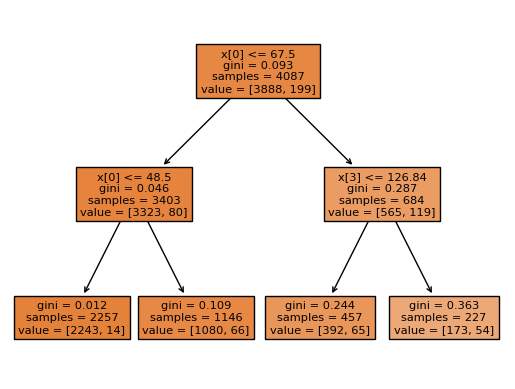

In [213]:
#will be trying with a max depth of 2, and then a max depth of 7
#using a classifier tree because the variable we are trying to predict is binary/not numeric

from sklearn import tree # Import the tree classifier

# Fit decision tree:
classify = tree.DecisionTreeClassifier(max_depth=2)
classify = classify.fit(X_train_2, y_train)

# Visualize results:
tree.plot_tree(classify,filled=True)

## Make Predictions on the Test Set
y_hat = classify.predict(X_test_2)

from sklearn.metrics import mean_squared_error

def pn(x):
    print(x,'\n')

#find the R2 and RMSE
pn(classify.score(X_test_2, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

0.9393939393939394 

0.24618298195866548 



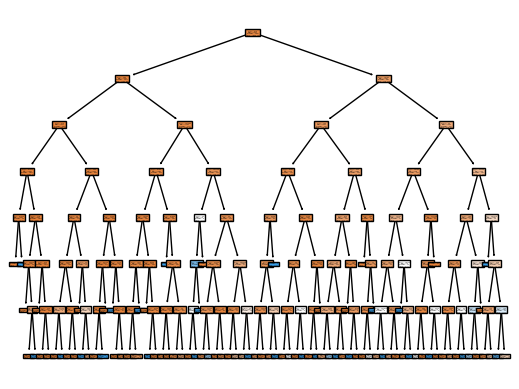

In [214]:
#max depth 7
# the decrease of the R squared value implies that this depth is overfitting

# Fit decision tree:
classify = tree.DecisionTreeClassifier(max_depth=7)
classify = classify.fit(X_train_2, y_train)

# Visualize results:
tree.plot_tree(classify,filled=True)

## Make Predictions on the Test Set
y_hat = classify.predict(X_test_2)

#find the R2 and RMSE
pn(classify.score(X_test_2, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

depth 1
0.9511241446725318 

0.22107884414269094 

depth 2
0.9511241446725318 

0.22107884414269094 

depth 3
0.9511241446725318 

0.22107884414269094 

depth 4
0.9511241446725318 

0.22107884414269094 

depth 5
0.9481915933528837 

0.2276146011290056 

depth 6
0.9452590420332356 

0.23396785669566753 

depth 7
0.9393939393939394 

0.24618298195866548 



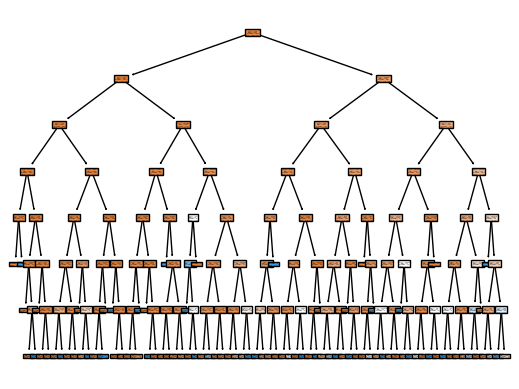

In [215]:
for k in range(1, 8):
  # Fit decision tree:
  classify = tree.DecisionTreeClassifier(max_depth=k)
  classify = classify.fit(X_train_2, y_train)

  # Visualize results:
  tree.plot_tree(classify,filled=True)

  ## Make Predictions on the Test Set
  y_hat = classify.predict(X_test_2)

  print("depth", k)
  #find the R2 and RMSE
  pn(classify.score(X_test_2, y_test)) # R squared measure

  pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

col_0     0
stroke     
0       973
1        50 



IndexError: ignored

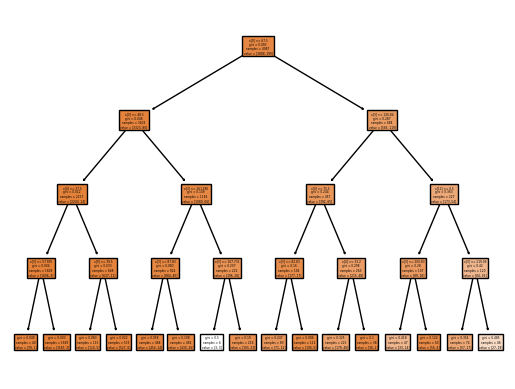

In [220]:
classify = tree.DecisionTreeClassifier(max_depth=4)
classify = classify.fit(X_train_2, y_train)

  # Visualize results:
tree.plot_tree(classify,filled=True)

  ## Make Predictions on the Test Set
y_hat = classify.predict(X_test_2)

tab = pd.crosstab(y_test, y_hat)
pn(tab)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])
pn(acc)

col_0     0   1
stroke         
0       959  14
1        49   1 

0.9384164222873901 



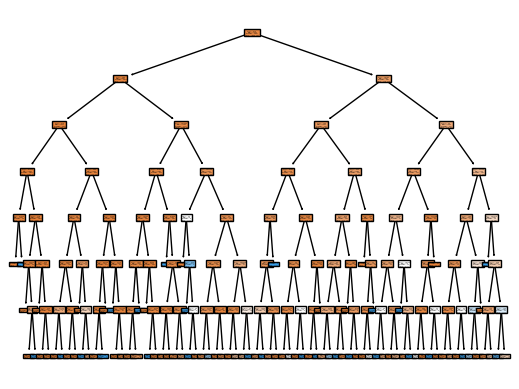

In [221]:
classify = tree.DecisionTreeClassifier(max_depth=7)
classify = classify.fit(X_train_2, y_train)

  # Visualize results:
tree.plot_tree(classify,filled=True)

  ## Make Predictions on the Test Set
y_hat = classify.predict(X_test_2)

tab = pd.crosstab(y_test, y_hat)
pn(tab)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])
pn(acc)

An attempt to try and reduce the overfit problem - Charlie

Won't overwrite anything above.

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for whatever reason I can never seem to use the same filepath as y'all
df_train = pd.read_csv(r'/content/training_data.csv')
df_test = pd.read_csv(r'/content/testing_data.csv')

In [231]:
df_train.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [232]:
# make column names lowercase
df_train.columns = map(str.lower, df_train.columns)
df_test.columns = map(str.lower, df_test.columns)

In [233]:
# drop uncessary columns (Unnamed: 0, and id)
df_train = df_train.drop(df_train.columns[:2], axis=1)
df_test = df_test.drop(df_test.columns[:2], axis=1)

In [234]:
### NEW ###
df_train = df_train.dropna()
df_test = df_test.dropna()

In [235]:
### NEW ###
df_train = df_train.drop(labels=['work_type', 'residence_type','gender','ever_married'], axis=1)
df_test = df_test.drop(labels=['work_type', 'residence_type','gender','ever_married'], axis=1)

In [236]:
df_train['smoking_status'].value_counts()

never smoked       1473
Unknown            1195
formerly smoked     660
smokes              600
Name: smoking_status, dtype: int64

In [237]:
### NEW ###

df_train.loc[df_train['smoking_status'] == 'never smoked', 'smoking_status'] = 0
df_train.loc[df_train['smoking_status'] == 'Unknown', 'smoking_status'] = 1
df_train.loc[df_train['smoking_status'] == 'formerly smoked', 'smoking_status'] = 2
df_train.loc[df_train['smoking_status'] == 'smokes', 'smoking_status'] = 3

df_test.loc[df_test['smoking_status'] == 'never smoked', 'smoking_status'] = 0
df_test.loc[df_test['smoking_status'] == 'Unknown', 'smoking_status'] = 1
df_test.loc[df_test['smoking_status'] == 'formerly smoked', 'smoking_status'] = 2
df_test.loc[df_test['smoking_status'] == 'smokes', 'smoking_status'] = 3

df_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,58.0,1,0,87.96,39.2,0,0
1,8.0,0,0,110.89,17.6,1,0
2,70.0,0,0,69.04,35.9,2,0
3,47.0,0,0,210.95,50.1,1,0
4,74.0,1,0,205.84,54.6,0,0


In [238]:
df_train = df_train.drop(labels=['age'], axis=1)
df_test = df_test.drop(labels=['age'], axis=1)

In [239]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

0.9612640163098879 

0.19681459216763408 



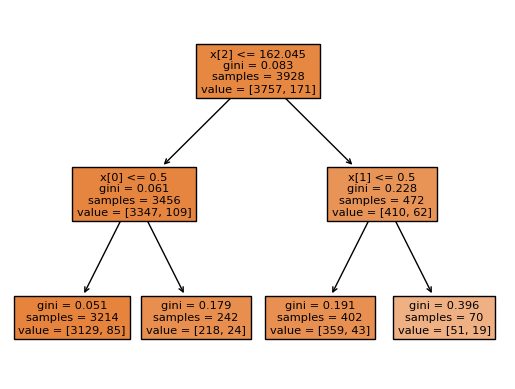

In [240]:
from sklearn import tree # Import the tree classifier

# Fit decision tree:
classify = tree.DecisionTreeClassifier(max_depth=2)
classify = classify.fit(X_train, y_train)

# Visualize results:
tree.plot_tree(classify,filled=True)

## Make Predictions on the Test Set
y_hat = classify.predict(X_test)

from sklearn.metrics import mean_squared_error

def pn(x):
    print(x,'\n')

#find the R2 and RMSE
pn(classify.score(X_test, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

depth 1
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth 2
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth 3
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth 4
col_0     0  1
stroke        
0       937  6
1        36  2 

0.9571865443425076 

0.2069141262879177 

depth 5
col_0     0  1
stroke        
0       934  9
1        35  3 

0.9551478083588175 

0.21178336016123284 

depth 6
col_0     0  1
stroke        
0       934  9
1        34  4 

0.9561671763506626 

0.2093628994099418 

depth 7
col_0     0   1
stroke         
0       930  13
1        35   3 

0.9510703363914373 

0.2212005054437324 

depth 8
col_0     0   1
stroke         
0       927  16
1        33   5 

0.9500509683995922 

0.22349279988493534 

depth 9
col_0     0   1
stroke         
0       923  20
1        33   5 

0.9459734964322121 

0.2324360203750442 



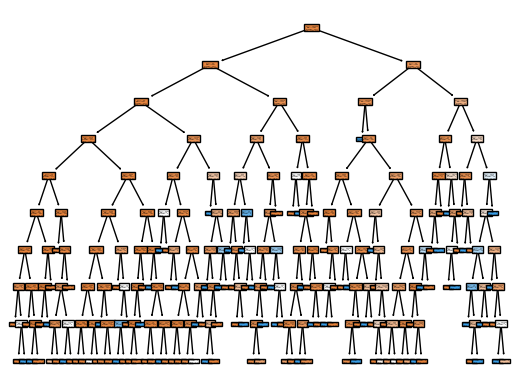

In [241]:
for k in range(1,10):
  # Fit decision tree:
  classify = tree.DecisionTreeClassifier(max_depth=k)
  classify = classify.fit(X_train, y_train)

  # Visualize results:
  tree.plot_tree(classify,filled=True)

  ## Make Predictions on the Test Set
  y_hat = classify.predict(X_test)

  print("depth", k)
  #find the R2 and RMSE
  pn(pd.crosstab(y_test, y_hat))
  pn(classify.score(X_test, y_test)) # R squared measure

  pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

depth  3 min_leaf_samples  2
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth  3 min_leaf_samples  3
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth  3 min_leaf_samples  4
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth  3 min_leaf_samples  5
col_0     0
stroke     
0       943
1        38 

0.9612640163098879 

0.19681459216763408 

depth  4 min_leaf_samples  2
col_0     0  1
stroke        
0       937  6
1        36  2 

0.9571865443425076 

0.2069141262879177 

depth  4 min_leaf_samples  3
col_0     0  1
stroke        
0       937  6
1        36  2 

0.9571865443425076 

0.2069141262879177 

depth  4 min_leaf_samples  4
col_0     0  1
stroke        
0       937  6
1        36  2 

0.9571865443425076 

0.2069141262879177 

depth  4 min_leaf_samples  5
col_0     0  1
stroke        
0       937  6
1        36  2 

0.9571865443425076 

0

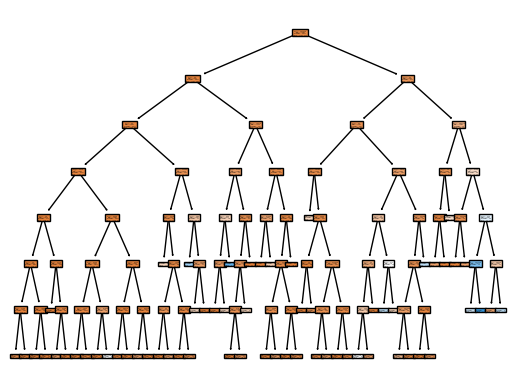

In [242]:
for k in range(3,8):
  for i in range(2,6):
  # Fit decision tree:
    classify = tree.DecisionTreeClassifier(max_depth=k, min_samples_leaf=i)
    classify = classify.fit(X_train, y_train)

  # Visualize results:
    tree.plot_tree(classify,filled=True)

  ## Make Predictions on the Test Set
    y_hat = classify.predict(X_test)

    print("depth ", k, "min_leaf_samples ",i)
  #find the R2 and RMSE
    pn(pd.crosstab(y_test, y_hat))
    pn(classify.score(X_test, y_test)) # R squared measure

    pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

[Text(0.564935064935065, 0.9285714285714286, 'x[2] <= 162.045\ngini = 0.083\nsamples = 3928\nvalue = [3757, 171]'),
 Text(0.35064935064935066, 0.7857142857142857, 'x[0] <= 0.5\ngini = 0.061\nsamples = 3456\nvalue = [3347, 109]'),
 Text(0.19805194805194806, 0.6428571428571429, 'x[1] <= 0.5\ngini = 0.051\nsamples = 3214\nvalue = [3129, 85]'),
 Text(0.1038961038961039, 0.5, 'x[3] <= 22.75\ngini = 0.045\nsamples = 3107\nvalue = [3035, 72]'),
 Text(0.05194805194805195, 0.35714285714285715, 'x[4] <= 1.5\ngini = 0.013\nsamples = 770\nvalue = [765, 5]'),
 Text(0.025974025974025976, 0.21428571428571427, 'x[4] <= 0.5\ngini = 0.009\nsamples = 666\nvalue = [663, 3]'),
 Text(0.012987012987012988, 0.07142857142857142, 'gini = 0.021\nsamples = 186\nvalue = [184, 2]'),
 Text(0.03896103896103896, 0.07142857142857142, 'gini = 0.004\nsamples = 480\nvalue = [479, 1]'),
 Text(0.07792207792207792, 0.21428571428571427, 'x[3] <= 21.15\ngini = 0.038\nsamples = 104\nvalue = [102, 2]'),
 Text(0.06493506493506493

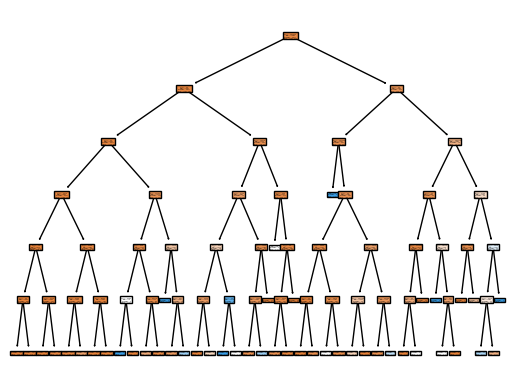

In [244]:
# best model
classify = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
classify = classify.fit(X_train, y_train)

  # Visualize results:
tree.plot_tree(classify,filled=True)

Conclusion: seems like the overfit problem is here to stay. Bummer. Can't lower the minimum leaf samples too much as stroke=1 so rarely. Here are two different best versions:

lowest r^2 and RMSE, but only predicts "no stroke": any depth between 1 and 3 (min leaf samples irrelevant).

R^2 = 0.9613, RMSE = 0.1968

Best model that occasionally actually predicts strokes: depth = 4, any min leaf samples between 1-5.

R^2 = 0.9572, RMSE = 0.2094

My favorite: depth = 6, min leaf samples = 2

R^2 = 0.9572, RMSE = 0.2094